## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- numpy (np) → Used for numerical operations and handling arrays.
- pandas (pd) → Used for data manipulation, storage, and analysis.
- matplotlib.pyplot (plt) → Used for creating visualizations (line plots, bar charts, etc.).
- seaborn (sns) → A higher-level statistical visualization library built on top of Matplotlib.

## Load the Dataset from an Excel File

In [2]:
# Loading the data
orders = pd.read_excel("../Dataset.xlsx")
Return =  pd.read_excel("../Dataset.xlsx", sheet_name='Returns')
people =  pd.read_excel("../Dataset.xlsx", sheet_name='People')

- pd.read_excel("file.xlsx") → Reads an Excel file and loads it into a Pandas DataFrame.
- orders DataFrame → Loads the default sheet (assumed to contain order details).
- Return DataFrame → Loads a specific sheet named "Returns", containing return order data.
- people DataFrame → Loads another sheet named "People", containing employee/manager information.

----------------

## Exploring the dataset

In [3]:
# Sorting the data in the order of order date
orders = orders.sort_values(by='Order Date',ascending=True) 
orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


##### Order contain 9994 rows and 21 columns (shown below) of data and after performing some basic operations on data we found out that the data type of each feature (columns) are in desired form and does not contain any null values (non null count is equal to the total row count.

In [4]:
orders.shape

(9994, 21)

In [5]:
pd.DataFrame(orders.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 7980 to 906
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 non-

""


In [6]:
# Check for missing values in 'orders' DataFrame
missing_values_orders = pd.DataFrame(orders.isnull().sum())
missing_values_orders.columns = ["Null Value count"]
print(missing_values_orders)

               Null Value count
Row ID                        0
Order ID                      0
Order Date                    0
Ship Date                     0
Ship Mode                     0
Customer ID                   0
Customer Name                 0
Segment                       0
Country                       0
City                          0
State                         0
Postal Code                   0
Region                        0
Product ID                    0
Category                      0
Sub-Category                  0
Product Name                  0
Sales                         0
Quantity                      0
Discount                      0
Profit                        0


In [7]:
orders.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


#### Key Observations:
1. The dataset contains 9994 orders.
2. Orders data contain orders from January 3rd 2014 to December 30 2017.
3. Sales distribution is highly skewed, with most transactions being low-value (median: 54.49), while a few high-value orders (up to $22,638) significantly raise the average order value to 229.86.
4. Wide variation in order sizes (standard deviation: 623.24) confirms that 75% of sales are below the mean, indicating a right-skewed distribution.
5. The majority of orders contain 3–5 items, but some bulk buyers purchase up to 14 items per order.
6. Half of the orders have discounts up to 20%, while some go as high as 80%.
7. Some orders incurred massive losses (-6599.97) → Likely due to heavy discounting or high return costs. 
8. Median profit is low (8.66 per order), indicating many low-margin transactions.
9. High standard deviation (234.26) → Some orders are highly profitable, while others make losses

Text(0.5, 1.0, 'Histogram of Sales figures showing a right skewed plot')

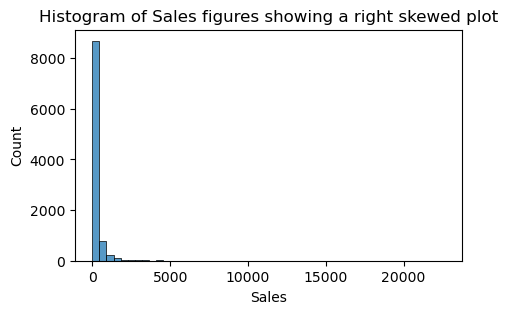

In [8]:
plt.figure(figsize=(5,3))
sns.histplot(data=orders,x='Sales',bins=50)
plt.title('Histogram of Sales figures showing a right skewed plot')

#### Return data.
1. Return data contain 2 columns Returned & Order ID. Returned column is like a lable for the order which were returned and contain Yes as the record. Order ID column contain the order ids of the customers which returned the order.
2. There are 296 orders which were returned as there are 296 unique orders ids in the data.
3. There are no null values in the returned data.


In [9]:
Return.head(3)

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345


In [10]:
# Check for missing values in 'Return' DataFrame
missing_values_return = Return.isnull().sum()
print(missing_values_return)

Returned    0
Order ID    0
dtype: int64


In [11]:
pd.DataFrame(Return.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


""


#### People data.
1. People data contain the names of regional managers and contain 2 columns (Person & Region).
2. The country is divided into 4 regions and are 4 regional managers.


In [12]:
people

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


----------

### Creating New features

In [13]:
# Calculate Delivery Time
orders['delivery time'] = orders['Ship Date'] - orders['Order Date']
# Extract Month Name
orders['Month'] = orders['Order Date'].dt.month_name()
# Extract Day of the Week
orders['Day'] = orders['Order Date'].dt.day_name()
# Extract Year
orders['Year'] = orders['Order Date'].dt.year
# Extract Week Number
orders['Week'] = orders['Order Date'].dt.isocalendar().week
# Extract Quarter
orders['Quarter'] = orders['Order Date'].dt.to_period("Q")
# Calculate Price per Item
orders['Price'] = orders['Sales']/orders['Quantity']
# Extract Month as a Number
orders['Month_order'] = orders['Order Date'].dt.month

In [14]:
# Product orders counts
product_orders = pd.DataFrame(orders['Product Name'].value_counts()).reset_index()
product_orders.columns = ['Product Name','Order_count']
product_orders

,Product Name,Order_count
0,Staple envelope,48
1,Easy-staple paper,46
2,Staples,46
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,19
...,...,...
1845,Eldon Jumbo ProFile Portable File Boxes Graphi...,1
1846,Newell 342,1
1847,Xerox WorkCentre 6505DN Laser Multifunction Pr...,1
1848,Belkin 7 Outlet SurgeMaster Surge Protector wi...,1


##### Key Observations:
1. "Staple Envelope" (48 orders), "Easy-Staple Paper" (46 orders), and "Staples" (46 orders) are the most frequently ordered products.
2. This suggests high demand for office supplies, likely from corporate customers.
3. Multiple staple-related products appear in the top orders, confirming office essentials are in high demand.
4. Many products (e.g., "Acco Glide Clips", "Xerox WorkCentre 6505DN") have only 1 order.

##### Actionables:
1. Maintain high inventory levels for these products to avoid stockouts.
2. Consider removing slow-moving inventory or bundling these products with popular items to increase sales.
3. Offer bulk purchase discounts on these items to increase revenue from corporate clients.

In [15]:
# Orders region wise
region_wise_orders = orders[['Region','Order ID']].drop_duplicates()
region_wise_orders = pd.DataFrame(region_wise_orders['Region'].value_counts()).reset_index()
region_wise_orders.columns = ['Region','Order_count']
region_wise_orders

,Region,Order_count
0,West,1611
1,East,1401
2,Central,1175
3,South,822


In [16]:
orders.groupby(by='Region')['delivery time'].mean()

Region
Central   4 days 01:23:41.093413689
East      3 days 21:48:32.359550561
South     3 days 22:59:33.333333333
West      3 days 22:18:50.689978145
Name: delivery time, dtype: timedelta64[ns]

##### Code Understanding
1. Selects only the 'Region' and 'Order ID' columns from the dataset.
2. Uses .drop_duplicates() to ensure that each order is counted only once per region, preventing multiple product entries from inflating the count.
3. value_counts() counts the number of unique orders per region.
4. reset_index() converts it into a DataFrame.
5. Renames columns to 'Region' and 'Order_count' for clarity.

##### Key Observations:
1. West Region Leads in Orders & South Region Has the Lowest Orders.
2. If the West region has the highest order count, it suggests strong demand and customer engagement in that area.
3. If the South region has the fewest orders, it may indicate weaker market penetration or longer shipping times.


##### Actionables:
1. Strengthen logistics, delivery efficiency, and marketing in this high-performing region.
2. Maintain higher stock levels in high-order regions to avoid stockouts.
3. Improve marketing efforts and evaluate shipping delays to boost sales in this region.

In [17]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'delivery time', 'Month', 'Day', 'Year', 'Week', 'Quarter', 'Price',
       'Month_order'],
      dtype='object')

------

## Customer detail

In [67]:
orders['Customer ID'].nunique()

793

There are total 793 customers who have choosed Superstore for shopping over years.

In [68]:
orders.groupby(by=['Year'])['Customer ID'].nunique()

Year
2014    595
2015    573
2016    638
2017    693
Name: Customer ID, dtype: int64

Year on year breakup of customers visits from 2014 to 2017 with linear growth with a slump of visit of in 2015.

#### New & Existing Customers

Below code classifies customers as "New" or "Existing" based on their first purchase year and analyzes customer trends over time.

##### 1. Identify Existing Customers (Before 2015).
   
Creates a list of unique customers who made purchases before 2015.

In [20]:
existing_customers = list(orders.loc[orders['Year'] < 2015]['Customer ID'].unique())

##### 2. Define a Function to Classify Customers
- Checks if a Customer ID exists in existing_customers.
- If not found, adds them to the list and labels them "New Customer".
- Otherwise, labels them as an "Existing Customer".

In [21]:
def New_or_existing(Cust_ID):
    a = existing_customers 
    if Cust_ID not in a:
        existing_customers.append(Cust_ID)
        return "New Customer"
    else:
        return "Existing customer"

##### 3. Apply Classification to All Customers

Classifies each customer in the dataset as "New" or "Existing".

In [22]:
orders['Customer_type'] = orders['Customer ID'].apply(New_or_existing)

##### 4. Aggregate Customer Counts by Year & Type.
- Groups customers by year and type.
- Counts unique customers per category.

In [23]:
New_customer_by_years = pd.DataFrame(orders.groupby(by=['Year','Customer_type'])['Customer ID'].nunique()).reset_index()
New_customer_by_years.columns = ["Year",'Customer_type','Count of Customers']
New_customer_by_years

,Year,Customer_type,Count of Customers
0,2014,Existing customer,595
1,2015,Existing customer,536
2,2015,New Customer,136
3,2016,Existing customer,625
4,2016,New Customer,51
5,2017,Existing customer,692
6,2017,New Customer,11


✅ Key Observations:

- Existing customers dominate yearly sales.
- New customer acquisition declines over time, indicating a need for better marketing strategies.
- The number of existing customers purchasing again has increased from 536 (2015) to 692 (2017).
- This indicates strong customer retention, meaning loyal customers trust the brand and keep buying.
- Encouraging higher order frequency from repeat customers will sustain revenue growth.

-----------------------------

#### Customer with counts of orders

In [24]:
customer_orders = orders.groupby(by='Customer ID')['Order ID'].nunique().reset_index()
customer_orders.columns = ['Customer ID','Count_of_Orders']
customer_orders['Count_of_Orders'].value_counts().reset_index()

,Count_of_Orders,count
0,5,134
1,7,116
2,6,107
3,4,96
4,8,82
5,9,71
6,3,53
7,10,39
8,2,34
9,11,23


✅ Key Observations:
1. A significant number of customers have placed 5+ orders (e.g., 134 customers have 5 orders, 116 have 7 orders, 107 have 6 orders).
2. Only 12 customers placed a single order → This is very low compared to multi-order customers.
3. Most common order frequencies: 5 orders (134 customers), 7 orders (116 customers), 6 orders (107 customers).
4. The drop-off after 9 orders (71 customers) to 10 orders (39 customers) suggests that customers stop ordering after a certain point.

Actionables:
1. Introduce targeted re-engagement campaigns for customers with 8-9 orders to encourage them to keep buying.
2. Introduce subscription models or loyalty discounts for customers with 5+ orders.
3. Continue personalized email marketing and follow-up offers to encourage first-time buyers to return.
4.  Introduce subscription models or loyalty discounts for customers with 5+ orders.

#### Time between orders

In [25]:
Customer_order_date = orders[['Customer ID','Order ID','Order Date']].drop_duplicates().sort_values(by=['Customer ID','Order Date'])
Customer_order_date.head(10)

,Customer ID,Order ID,Order Date
2230,AA-10315,CA-2014-128055,2014-03-31
7468,AA-10315,CA-2014-138100,2014-09-15
1299,AA-10315,CA-2015-121391,2015-10-04
5198,AA-10315,CA-2016-103982,2016-03-03
1159,AA-10315,CA-2017-147039,2017-06-29
1172,AA-10375,CA-2014-158064,2014-04-21
3007,AA-10375,CA-2014-130729,2014-10-24
808,AA-10375,CA-2015-140921,2015-02-03
1978,AA-10375,CA-2015-109939,2015-05-08
6465,AA-10375,CA-2015-114503,2015-11-13


In [26]:
# Customer_order_date['Previous_order_date'] = Customer_order_date['Order Date'].shift(1)
Customer_order_date['Previous_order_date'] = Customer_order_date.groupby(['Customer ID'])['Order Date'].shift(1)

Customer_order_date['Time_between_orders'] =  Customer_order_date['Order Date'] - Customer_order_date['Previous_order_date']
Customer_order_date

,Customer ID,Order ID,Order Date,Previous_order_date,Time_between_orders
2230,AA-10315,CA-2014-128055,2014-03-31,NaT,NaT
7468,AA-10315,CA-2014-138100,2014-09-15,2014-03-31,168 days
1299,AA-10315,CA-2015-121391,2015-10-04,2014-09-15,384 days
5198,AA-10315,CA-2016-103982,2016-03-03,2015-10-04,151 days
1159,AA-10315,CA-2017-147039,2017-06-29,2016-03-03,483 days
...,...,...,...,...,...
18,ZD-21925,CA-2014-143336,2014-08-27,NaT,NaT
5898,ZD-21925,CA-2016-167682,2016-04-03,2014-08-27,585 days
3040,ZD-21925,US-2016-147991,2016-05-05,2016-04-03,32 days
3814,ZD-21925,CA-2016-152471,2016-07-08,2016-05-05,64 days


In [27]:
Time_between_orders = Customer_order_date.groupby(by="Customer ID").agg(Orders = ('Order ID','nunique'),Avg_Time_btw_orders =('Time_between_orders','mean')).reset_index()
Time_between_orders['Avg_Time_btw_orders'] = Time_between_orders['Avg_Time_btw_orders'].dt.days
Time_between_orders

,Customer ID,Orders,Avg_Time_btw_orders
0,AA-10315,5,296.0
1,AA-10375,9,166.0
2,AA-10480,4,359.0
3,AA-10645,6,246.0
4,AB-10015,3,498.0
...,...,...,...
788,XP-21865,11,139.0
789,YC-21895,5,283.0
790,YS-21880,8,153.0
791,ZC-21910,13,93.0


In [28]:
Time_between_orders.describe()

,Orders,Avg_Time_btw_orders
count,793.000000,781.000000
mean,6.316520,225.654289
std,2.550885,132.578002
min,1.000000,2.000000
25%,5.000000,144.000000
50%,6.000000,192.000000
75%,8.000000,268.000000
max,17.000000,1275.000000


✅ Key Observations:
1. The mean number of orders per customer is 6.32, with a median of 6.
2. 75% of customers place 5-8 orders, while some customers order up to 17 times
3. The average time between orders is 226 days, but some customers reorder as early as 2 days, while others take over 3 years (1275 days).
4. 25% of customers reorder within 144 days, while another 25% take over 268 days
5. The standard deviation of reorder time is 132 days, meaning some customers reorder very frequently, while others have long gaps.
   
Actionables:
1. Implement personalized reminders and discount offers for customers based on their buying cycle (e.g., send re-engagement emails after 120-150 days of inactivity).
2. Identify customers with low average reorder time (fast buyers) and offer bulk purchase incentives or subscriptions to lock in long-term commitment.

In [29]:
round(Time_between_orders['Orders'].value_counts()/len(Time_between_orders)*100,2)

Orders
5     16.90
7     14.63
6     13.49
4     12.11
8     10.34
9      8.95
3      6.68
10     4.92
2      4.29
11     2.90
12     2.27
1      1.51
13     0.88
17     0.13
Name: count, dtype: float64

<Axes: xlabel='Avg_Time_btw_orders', ylabel='Orders'>

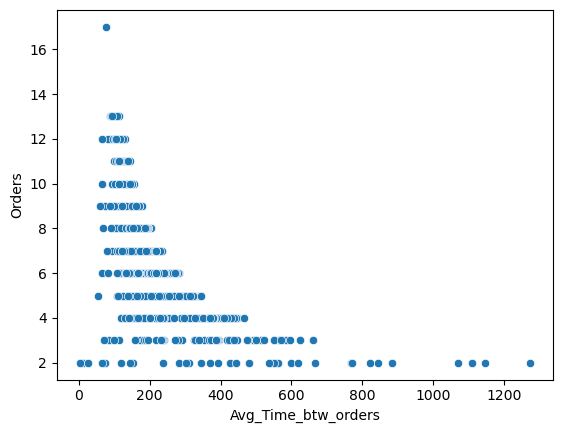

In [30]:
sns.scatterplot(data=Time_between_orders,x='Avg_Time_btw_orders',y='Orders')

<Axes: xlabel='Avg_Time_btw_orders', ylabel='Count'>

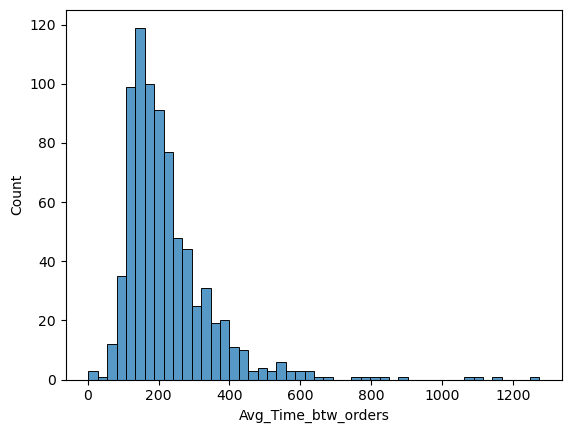

In [31]:
sns.histplot(data=Time_between_orders,x='Avg_Time_btw_orders')

In [32]:
cust_agg_stats = orders.groupby(['Customer ID']).agg(Product_count = ('Order ID','count'),Sales = ('Sales','sum'),Avg_Sales = ('Sales','mean'),
        Profit = ('Profit','sum'),Avg_Profit = ('Profit','mean'),Quantity = ('Quantity','sum'),
        Avg_Quantity = ('Quantity','mean'),Discount = ('Discount','mean')).reset_index().round(2)

In [33]:
Cust_  = Time_between_orders.merge(cust_agg_stats,on='Customer ID',how='right')
Cust_

,Customer ID,Orders,Avg_Time_btw_orders,Product_count,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount
0,AA-10315,5,296.0,11,5563.56,505.78,-362.88,-32.99,30,2.73,0.09
1,AA-10375,9,166.0,15,1056.39,70.43,277.38,18.49,41,2.73,0.08
2,AA-10480,4,359.0,12,1790.51,149.21,435.83,36.32,36,3.00,0.02
3,AA-10645,6,246.0,18,5086.93,282.61,857.80,47.66,64,3.56,0.06
4,AB-10015,3,498.0,6,886.16,147.69,129.35,21.56,13,2.17,0.07
...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,11,139.0,28,2374.66,84.81,621.23,22.19,100,3.57,0.05
789,YC-21895,5,283.0,8,5454.35,681.79,1305.63,163.20,31,3.88,0.08
790,YS-21880,8,153.0,12,6720.44,560.04,1778.29,148.19,58,4.83,0.05
791,ZC-21910,13,93.0,31,8025.71,258.89,-1032.15,-33.30,105,3.39,0.25


In [34]:
Cust_.describe()

,Orders,Avg_Time_btw_orders,Product_count,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount
count,793.000000,781.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,6.316520,225.654289,12.602774,2896.848575,227.868235,361.156507,27.279622,47.759142,3.788726,0.157440
std,2.550885,132.578002,6.242559,2628.670096,190.342396,894.261846,78.002682,24.842915,0.715214,0.089161
min,1.000000,2.000000,1.000000,4.830000,2.420000,-6626.390000,-736.270000,2.000000,1.750000,0.000000
25%,5.000000,144.000000,8.000000,1146.050000,115.520000,36.610000,5.510000,30.000000,3.330000,0.090000
50%,6.000000,192.000000,12.000000,2256.390000,183.920000,227.830000,20.200000,44.000000,3.750000,0.150000
75%,8.000000,268.000000,16.000000,3785.280000,282.690000,560.010000,43.680000,63.000000,4.220000,0.210000
max,17.000000,1275.000000,37.000000,25043.050000,1751.290000,8981.320000,748.440000,150.000000,8.000000,0.700000


#### Profitable & Loss making customers

In [35]:
Conditions = [
    (Cust_['Profit'] > 0),
    (Cust_['Profit'] < 0)
]
Categories = [
    'Profitable','Loss making'
]
Cust_['Customer_type'] = np.select(Conditions,Categories)
Cust_['Avg_Basket_size'] = Cust_['Product_count']/Cust_['Orders']
Cust_

,Customer ID,Orders,Avg_Time_btw_orders,Product_count,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount,Customer_type,Avg_Basket_size
0,AA-10315,5,296.0,11,5563.56,505.78,-362.88,-32.99,30,2.73,0.09,Loss making,2.200000
1,AA-10375,9,166.0,15,1056.39,70.43,277.38,18.49,41,2.73,0.08,Profitable,1.666667
2,AA-10480,4,359.0,12,1790.51,149.21,435.83,36.32,36,3.00,0.02,Profitable,3.000000
3,AA-10645,6,246.0,18,5086.93,282.61,857.80,47.66,64,3.56,0.06,Profitable,3.000000
4,AB-10015,3,498.0,6,886.16,147.69,129.35,21.56,13,2.17,0.07,Profitable,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,11,139.0,28,2374.66,84.81,621.23,22.19,100,3.57,0.05,Profitable,2.545455
789,YC-21895,5,283.0,8,5454.35,681.79,1305.63,163.20,31,3.88,0.08,Profitable,1.600000
790,YS-21880,8,153.0,12,6720.44,560.04,1778.29,148.19,58,4.83,0.05,Profitable,1.500000
791,ZC-21910,13,93.0,31,8025.71,258.89,-1032.15,-33.30,105,3.39,0.25,Loss making,2.384615


In [36]:
Cust_['Customer_type'].value_counts()

Customer_type
Profitable     638
Loss making    155
Name: count, dtype: int64

In [37]:
Cust_.groupby(by=['Customer_type']).agg(Customers = ('Customer ID','count'),
                                        Products_ordered = ('Product_count','mean'),Avg_Basket_size = ('Avg_Basket_size','mean'),
                                        Sales = ('Sales','sum'),Avg_Sales = ('Avg_Sales','mean'),
                                        Profit_or_Loss = ('Profit','sum'),Avg_Profit_Loss = ('Avg_Profit','mean'),
                                        Quantity = ('Quantity','sum'),Avg_Quantity = ('Avg_Quantity','mean'),
                                        Discount = ('Discount','mean')).reset_index()

,Customer_type,Customers,Products_ordered,Avg_Basket_size,Sales,Avg_Sales,Profit_or_Loss,Avg_Profit_Loss,Quantity,Avg_Quantity,Discount
0,Loss making,155,11.470968,2.031776,391950.40,217.704710,-71224.49,-44.210387,6780,3.839161,0.238000
1,Profitable,638,12.877743,1.993365,1905250.52,230.337429,357621.60,44.647884,31093,3.776473,0.137868


✅ Key Observations:
1. 638 customers (80%) are profitable, generating a total profit of 357,621.
2. 155 customers (20%) are loss-making, causing a total loss of 71,224.
3. Loss-making customers receive an average discount of 23.8%, whereas profitable customers get only 13.7% discounts.
4. This high discount rate directly contributes to negative profits.
5. Profitable customers have an average sale per order of 230, while loss-making customers have slightly lower sales at 217.
6. However, the key difference is profit per order:
    - Profitable customers = +44 per order
    - Loss-making customers = -44 per order
7. Profitable customers buy an average of 1.99 items per order, while loss-making customers buy 2.03 items per order.
8. This suggests that basket size alone is not the issue, but rather discounting and pricing strategies are affecting profitability.
9. Loss-Making Customers Contribute 17% of Total Sales but Create Losses


Actionables:
1. Cap discounts at 20% max and focus on alternative promotional strategies (bundle offers, loyalty points instead of direct discounts).
2. Encourage bulk purchases with “Spend More, Save More” promotions that reward higher spending instead of flat discounts.
3. Analyze loss-making customers to see if they are returning too many products or only buying during high-discount periods.
4. Introduce bundle pricing & bulk purchase discounts to increase basket size without cutting into profit margins.

Customer wise Different parameter 

In [38]:
def customer_stats(parameter,table):
    summary = table.groupby(by=[parameter]).agg(
        Customers = ('Customer ID','nunique'),Sales = ('Sales','sum'),Avg_Sales = ('Sales','mean'),
        Profit = ('Profit','sum'),Avg_Profit = ('Profit','mean'),Quantity = ('Quantity','sum'),
        Avg_Quantity = ('Quantity','mean'),Discount = ('Discount','mean')
    ).reset_index().round(2)
    summary['Profit_to_Sales_%'] = round(summary['Profit']/summary['Sales']*100,2)
    return summary.sort_values(by=['Profit_to_Sales_%','Sales'],ascending = False)

In [39]:
customer_stats('Segment',orders)

,Segment,Customers,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount,Profit_to_Sales_%
2,Home Office,148,429653.15,240.97,60298.68,33.82,6744,3.78,0.15,14.03
1,Corporate,236,706146.37,233.82,91979.13,30.46,11608,3.84,0.16,13.03
0,Consumer,409,1161401.34,223.73,134119.21,25.84,19521,3.76,0.16,11.55


✅ Key Observations:
1. Home Office Segment Has the Highest Profit Margin.
    - Profit-to-Sales Ratio: 14.03%, the highest among all segments.
    - Lower total sales (429K), but higher profit per sale than other segments.
2. Corporate Customers Generate the Second-Highest Profits
   - Profit-to-Sales Ratio: 13.03% (slightly lower than Home Office).
    - Higher total sales (706K) than Home Office, but with lower profit margins.
    - Corporate customers order more frequently (Avg. Sales = 233.82 per order) and purchase larger quantities (11,608 units in total).
3. Consumer Segment Drives the Most Sales But Has the Lowest Profit Margins
   - Highest total sales ($1.16M) but the lowest profit-to-sales ratio (11.55%).
   - Consumes the most discounts (16%), meaning deep discounting might be reducing profitability.
   - Orders the largest number of products (19,521 units) but at lower profit per unit.

Actionables:
1. Focus on Home Office customers for higher profitability.
2. Optimize Corporate pricing & offer bulk-order incentives to maintain profitability.
3. Reduce discounts on Consumer purchases & explore bundle pricing to boost profit margins.
4. Introduce targeted campaigns for each segment (e.g., business subscriptions for Corporate, loyalty perks for Home Office, and exclusive bundles for Consumers).

In [40]:
customer_stats('Region',orders)

,Region,Customers,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount,Profit_to_Sales_%
3,West,686,725457.82,226.49,108418.45,33.85,12266,3.83,0.11,14.94
1,East,674,678781.24,238.34,91522.78,32.14,10618,3.73,0.15,13.48
2,South,512,391721.90,241.80,46749.43,28.86,6209,3.83,0.15,11.93
0,Central,629,501239.89,215.77,39706.36,17.09,8780,3.78,0.24,7.92


✅ Key Observations:
1. West Region is the Most Profitable (14.94% Profit-to-Sales Ratio)
    - Highest total profit (108K) and highest profit-to-sales ratio (14.94%).
    - Sales volume is also the highest (725K), indicating strong demand and efficient pricing.
    - Discounts are the lowest (11%), meaning profit is well maintained.
2. East Region Performs Well But Has Higher Discounts (13.48% Profit Margin)
    - Total Sales: 678K (Second Highest), but discount rates (15%) are slightly higher than West.
    - Profitability (13.48%) is slightly lower than West, indicating a need for better pricing control.
    - Actionable : Reduce high discount rates in the East to improve profit margins while maintaining sales volume.
3. South Region Has Moderate Sales and Profit (11.93% Profit Margin)
    - Total sales (391K) are significantly lower than West & East, but profitability is still decent at 11.93%.
    - Average order value is the highest (241.80), indicating higher-value purchases per customer.
4. Central Region is the Least Profitable (7.92% Profit Margin)
    - Despite generating 501K in sales, Central has the lowest profit-to-sales ratio (7.92%).
    - Average profit per order is only $17, much lower than other regions.
    - Highest discount rate (24%), suggesting excessive discounting is hurting profitability.
    - Actionable Step : Reduce discounts significantly in the Central region to improve profitability.
    - Re-evaluate product pricing & marketing strategies to balance revenue and costs.
    - Analyze if Central customers are more price-sensitive and adjust promotional offers accordingly.


In [41]:
customer_stats('Category',orders)

,Category,Customers,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount,Profit_to_Sales_%
2,Technology,687,836154.03,452.71,145454.95,78.75,6939,3.76,0.13,17.40
1,Office Supplies,788,719047.03,119.32,122490.80,20.33,22906,3.80,0.16,17.04
0,Furniture,707,741999.80,349.83,18451.27,8.70,8028,3.79,0.17,2.49


✅ Key Observations:
1. Technology is the Most Profitable Category (17.4% Profit Margin).
    - Highest total profit (145K) and best profit-to-sales ratio (17.40%).
    - Highest average sales per order (452.71), meaning customers buy high-ticket items.
2. Office Supplies Generate High Sales with Strong Profitability (17.04%)
    - Total sales (719K) are strong, and profit margins (17.04%) are close to Technology.
    - Highest number of unique customers (788), meaning this category has the widest reach.
    - Largest quantity sold (22,906 units), meaning it has high sales volume but lower order values
3. Furniture is the Least Profitable Category (2.49% Profit Margin)
    - Despite generating 741K in sales, profit remains very low at just $18K.
    - Profit-to-sales ratio is only 2.49%, much lower than Technology & Office Supplies.
    - Discount rate (17%) is high, likely contributing to the low profit margin.9ly.


In [42]:
state_cust = customer_stats('State',orders)
state_cust

,State,Customers,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount,Profit_to_Sales_%
7,District of Columbia,4,2865.02,286.50,1059.59,105.96,40,4.00,0.00,36.98
6,Delaware,43,27451.07,285.95,9977.37,103.93,367,3.82,0.01,36.35
21,Minnesota,42,29863.15,335.54,10823.19,121.61,331,3.72,0.00,36.24
17,Maine,3,1270.53,158.82,454.49,56.81,35,4.38,0.00,35.77
12,Indiana,70,53555.36,359.43,18382.94,123.38,578,3.88,0.00,34.33
2,Arkansas,27,11678.13,194.64,4008.69,66.81,240,4.00,0.00,34.33
9,Georgia,83,49095.84,266.83,16250.04,88.32,705,3.83,0.00,33.10
24,Montana,8,5589.35,372.62,1833.33,122.22,56,3.73,0.07,32.80
37,Rhode Island,25,22627.96,404.07,7285.63,130.10,199,3.55,0.02,32.20
20,Michigan,106,76269.61,299.10,24463.19,95.93,946,3.71,0.01,32.07


✅ Key Observations:
1. Best Performing States (Profit-to-Sales Ratio Above 30%).
   - District of Columbia,Delaware,Minnesota, Maine & Indiana.
   - These states have high profit margins (above 30%) while maintaining low or zero discounts.
   - Customers in these regions are less price-sensitive, meaning they are willing to buy without heavy discounts but customers in these states are very less as compared to states like - California & New york.
   - Should focus on getting new customers from states like - District of Columbia,Delaware,Minnesota, Maine & Indiana
   - Indiana & Minnesota contribute the highest total sales among top profitable states.
2. Worst Performing States (Negative Profit-to-Sales Ratio Below -10%)
   - Ohio,Colorado, Tennessee,Texas,Illinois,Pennsylvania & Arizona.
   - Heavy discounting is a major cause of losses in these states (all exceeding 30% discounts).
   - Texas has the highest loss (25K loss on 170K sales), meaning it generates high revenue but is unprofitable due to heavy discounting.
   - Ohio & Pennsylvania have high negative profits despite strong sales, indicating inefficient pricing and promotions.
3. States like Wyoming (1), West Virginia (2), North Dakota (2), South Dakota (5), Vermont (5), and Montana (8) have a very small number of customers. These regions either have low market penetration or limited demand.

---------------------

## Orders detail

1. Basket Value - How much does customers spend in one single order.
2. Average Basket size - Average number of items per order.
3. Customers with single item orders.
4. Insight fromm customer with high basket value & size
5. Upsell/Cross sell rate - Measure how often customer buy multiple products.

In [43]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'delivery time', 'Month', 'Day', 'Year', 'Week', 'Quarter', 'Price',
       'Month_order', 'Customer_type'],
      dtype='object')

In [44]:
orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Profit,delivery time,Month,Day,Year,Week,Quarter,Price,Month_order,Customer_type
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,5.5512,4 days,January,Friday,2014,1,2014Q1,8.224,1,Existing customer
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,4.2717,4 days,January,Saturday,2014,1,2014Q1,3.928,1,Existing customer
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,-64.7748,4 days,January,Saturday,2014,1,2014Q1,90.912,1,Existing customer


orders based on different parameters
- Region, States, Categories, Sub-Category, Product Names, Segment

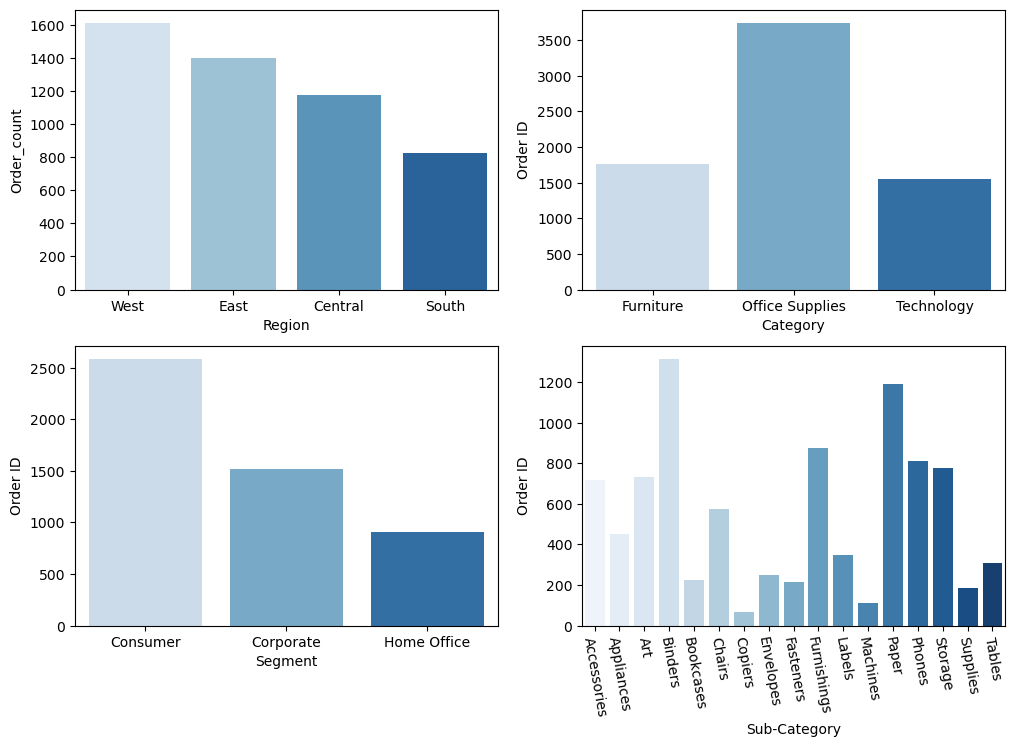

In [45]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(data=region_wise_orders,x='Region',y='Order_count',hue="Region",palette="Blues") # Region wise Orders

plt.subplot(2,2,2)
sns.barplot(data=pd.DataFrame(orders.groupby(by=['Category'])['Order ID'].nunique().reset_index()),x='Category',y='Order ID',hue="Category",palette="Blues") # Category wise orders

plt.subplot(2,2,3)
sns.barplot(data=pd.DataFrame(orders.groupby(['Segment'])['Order ID'].nunique().reset_index()),x="Segment",y="Order ID",hue="Segment",palette="Blues") # Orders based on Segment

plt.subplot(2,2,4)
# orders.groupby(['Sub-Category'])['Order ID'].nunique().plot(kind="bar",hue="Sub-Category",palette="viridis") # Order based on Sub-catgory
sns.barplot(data=pd.DataFrame(orders.groupby(['Sub-Category'])['Order ID'].nunique().reset_index()),x="Sub-Category",y="Order ID",hue="Sub-Category",palette="Blues") # Orders based on Segment
x,y =plt.xticks(rotation = 280)

✅ Key Observations:
1. Region-wise Orders:
   - The West region has the highest number of orders, followed by the East and Central regions.
   - The South region has the lowest order count.
2. Category-wise Orders:
   - Office Supplies dominates the number of orders, significantly higher than Furniture and Technology.
   - Furniture and Technology have nearly similar order counts, with Technology being slightly lower.
   - This indicates that office supplies are the most frequently purchased category.
3. Segment-wise Orders:
   - Consumer segment contributes the highest number of orders, much more than Corporate and Home Office segments.
   - Home Office has the lowest order count.
4. Sub-Category-wise Orders:
   - Certain sub-categories like Binders, Paper, and Machines have high order counts.
   - Other sub-categories such as Copiers and Tables have significantly lower orders.
   - This suggests that businesses and consumers purchase office essentials more frequently than high-value furniture or specialized technology.

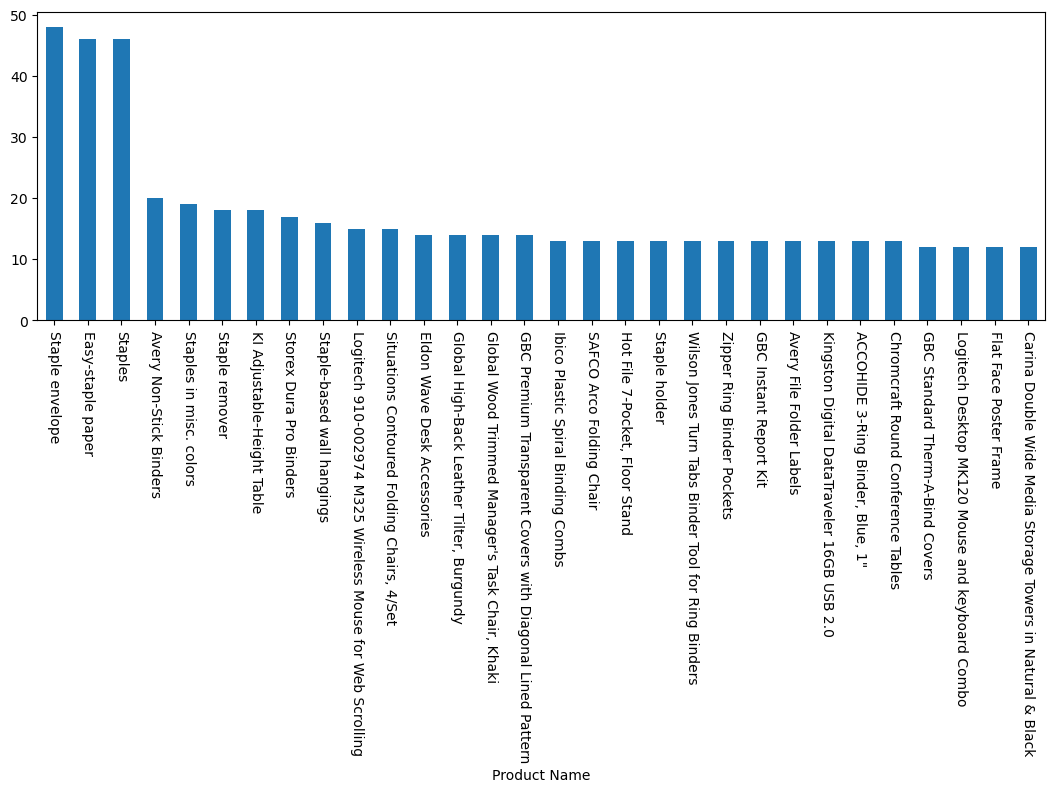

In [46]:
plt.figure(figsize=(13,4))

# Products orders 
orders['Product Name'].value_counts().head(30).plot(kind='bar')
x,y = plt.xticks(rotation = 270)

✅ Key Observations:
1. Top-Selling Products:
   - The highest ordered products are Staple Envelope, Easy-Staple Paper, and Staples, showing strong demand for basic office supplies.
2. Diversity in Product Demand:
   - The top 30 products include a mix of office stationery (binders, labels, staplers), furniture (adjustable-height tables, conference tables), and tech accessories (wireless mouse, keyboard, USB storage).
3. High Frequency of Low-Cost Items:
   - Most of the top-ordered products are low-cost office essentials (staplers, paper, binders), which could indicate high sales volume but possibly low profit margins.
4. Presence of High-Value Items:
   - Global High-Back Leather Tilter, Task Chair, Logitech Wireless Mouse, and Kingston USB Drive appear in the list, indicating that some tech and furniture items are also popular.
5. Opportunities for Bundling:
   - Since many top-selling products are related (e.g., staplers and staple removers, binders and binder labels), there is a clear opportunity to bundle these products into combo offers to increase revenue per order.
    

In [47]:
# Basket value
orders_detail = orders[['Order ID','Discount','Profit','Quantity','Sales']].groupby(['Order ID']).agg(
    Product_count=('Order ID','count'),
    Total_Sales=('Sales','sum'),
    Total_Profit=('Profit','sum'),
    Total_Quantity = ('Quantity','sum'),
    Total_Discount=('Discount','sum')
).reset_index()

In [48]:
orders_detail

,Order ID,Product_count,Total_Sales,Total_Profit,Total_Quantity,Total_Discount
0,CA-2014-100006,1,377.970,109.6113,3,0.0
1,CA-2014-100090,2,699.192,-19.0890,9,0.4
2,CA-2014-100293,1,91.056,31.8696,6,0.2
3,CA-2014-100328,1,3.928,1.3257,1,0.2
4,CA-2014-100363,2,21.376,7.7192,5,0.4
...,...,...,...,...,...,...
5004,US-2017-168802,1,18.368,5.9696,4,0.2
5005,US-2017-169320,2,171.430,16.6721,7,0.0
5006,US-2017-169488,2,56.860,26.5552,7,0.0
5007,US-2017-169502,2,113.410,32.4527,8,0.0


In [49]:
Basket = orders_detail.groupby(by='Product_count').agg(
    orders=('Total_Sales','count'),
    Sales=('Total_Sales','sum'),
    Avg_Sales=('Total_Sales','mean'),
    Profit=('Total_Profit','sum'),
    Avg_profit=('Total_Profit','mean'),
    Total_Quantity = ('Total_Quantity','sum'),
    Avg_Quantity=('Total_Quantity','mean'),
    Discount=('Total_Discount','sum'),
    Avg_discount=('Total_Discount','mean')
).reset_index().round(2)
Basket['Profit_to_Sale_%'] = round(Basket['Profit']/Basket['Sales']*100,2)
Basket

,Product_count,orders,Sales,Avg_Sales,Profit,Avg_profit,Total_Quantity,Avg_Quantity,Discount,Avg_discount,Profit_to_Sale_%
0,1,2538,528495.40,208.23,63335.50,24.95,9681,3.81,397.90,0.16,11.98
1,2,1220,540894.96,443.36,64834.23,53.14,9195,7.54,382.49,0.31,11.99
2,3,603,458647.30,760.61,64817.07,107.49,6814,11.30,295.79,0.49,14.13
3,4,336,311516.29,927.13,50092.60,149.09,5044,15.01,192.10,0.57,16.08
4,5,158,211251.91,1337.04,30295.39,191.74,3002,19.00,128.79,0.82,14.34
5,6,70,73715.02,1053.07,4328.05,61.83,1593,22.76,63.30,0.90,5.87
6,7,51,107810.23,2113.93,340.29,6.67,1418,27.80,63.32,1.24,0.32
7,8,16,20289.30,1268.08,2467.20,154.20,456,28.50,19.70,1.23,12.16
8,9,10,17512.65,1751.27,1016.33,101.63,373,37.30,14.10,1.41,5.80
9,10,3,13438.57,4479.52,2039.66,679.89,121,40.33,1.10,0.37,15.18


✅ Key Observations:
1. Most Orders Contain 1-3 Products:
    - ~70% of orders have 1-3 products, contributing the majority of revenue and profit.
    - Large basket orders (7+) are rare, suggesting customers prefer fewer items per purchase.
2. Larger Orders Yield Higher Revenue and Profit Per Order:
   - Avg_Sales and Avg_Profit increase with Product_count, confirming that customers buying more items spend more.
   - Orders with 4-5 products have the best profitability (14-16% profit margin).
3. Profitability Drops for Large Orders (6-9 items):
   - Orders with 6+ items have lower Profit-to-Sale % (5.87% for 6 products, 0.32% for 7).
   - High discounting on larger orders (Avg_Discount increases significantly) could be causing this.
   - Orders with 9 products have the lowest profitability (5.80%)—possibly due to aggressive discounts.
4. Orders with 10+ Products Have High Profitability Again:
   - Orders with 10-12 products show a recovery in margin (15-24%).
   - These could be bulk business orders that receive fewer discounts or contain high-margin products.

Actionables
1. Encourage Mid-Sized Orders (3-5 items):
   - These orders have high revenue, good profit margins (14-16%), and manageable discounts.
   - Use "Buy More, Save More" promotions to encourage orders of 3-5 items instead of just 1-2.
2. Reduce Discounts on Large Orders (6-9 items):
   - The sharp drop in profitability suggests that discounts on these orders may be excessive.
   - Consider revising the discount structure to maintain a minimum profit margin.
3. Analyze 10+ Product Orders for Business Trends:
   - These orders have high profit margins but are rare.
   - Investigate whether corporate customers or bulk buyers are driving these purchases and offer targeted pricing strategies.
4. Improve Cross-Selling & Bundling:
   - Customers usually buy only 1-3 products per order—suggesting missed opportunities for bundling.
   - Suggest complementary products at checkout to increase average order size.

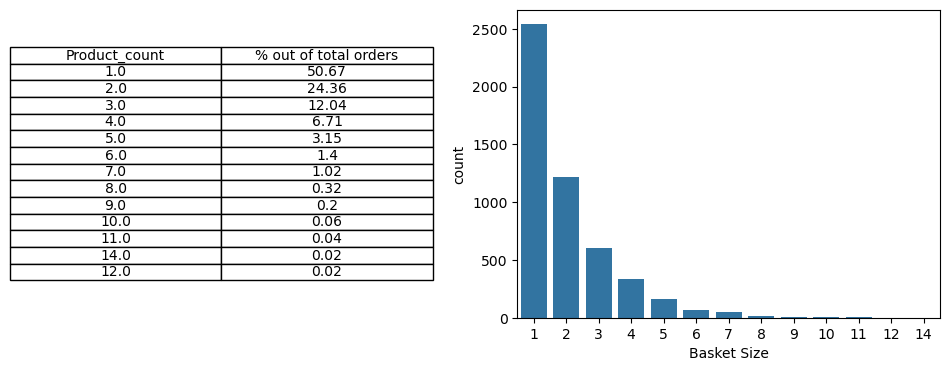

In [50]:
Basket_size = round(orders_detail['Product_count'].value_counts()/len(orders_detail)*100,2).reset_index()
Basket_size.columns = ['Product_count','% out of total orders']

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].axis('off')
ax[0].table(cellText=Basket_size.values,colLabels=Basket_size.columns,cellLoc='center',loc='center')

sns.countplot(data=orders_detail,x='Product_count')
x = plt.xlabel("Basket Size")

✅ Key Observations:
1. Most Orders Contain 1-2 Products:
   - 50.67% of orders contain only 1 product.
   - 24.36% of orders contain 2 products.
   - In total, ~75% of orders have 1-2 products, meaning customers generally buy in small quantities.
2. Orders with 3-5 Products are Less Frequent but Meaningful:
   - 3-item orders: 12.04%
   - 4-item orders: 6.71%
   - 5-item orders: 3.15%
   - While these account for fewer orders, they likely contribute higher revenue per order.
3. Larger Baskets (6+ Products) are Rare:
   - Only 1.4% of orders have 6 items, and it continues to decline from there.
   - Orders with 10+ products are nearly nonexistent (0.06% or less).
   - Customers do not typically purchase in large bulk, indicating a need for better cross-selling or bundling strategies.

In [51]:
def profit_loss_stats(parameter,table):
    summary = table.groupby(by=[parameter]).agg(
        Orders = ('Order ID','nunique'),Sales = ('Sales','sum'),Avg_Sales = ('Sales','mean'),
        Profit = ('Profit','sum'),Avg_Profit = ('Profit','mean'),Quantity = ('Quantity','sum'),
        Avg_Quantity = ('Quantity','mean'),Discount = ('Discount','mean')
    ).reset_index().round(2)
    summary['Profit_to_Sales_%'] = round(summary['Profit']/summary['Sales']*100,2)
    return summary.sort_values(by=['Profit_to_Sales_%','Sales'],ascending = False)

In [52]:
profit_loss_stats(parameter='Year',table=orders).sort_values(by='Year')

,Year,Orders,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount,Profit_to_Sales_%
0,2014,969,484247.50,242.97,49543.97,24.86,7581,3.80,0.16,10.23
1,2015,1038,470532.51,223.85,61618.60,29.31,7979,3.80,0.16,13.10
2,2016,1315,609205.60,235.49,81795.17,31.62,9837,3.80,0.15,13.43
3,2017,1687,733215.26,221.38,93439.27,28.21,12476,3.77,0.16,12.74


✅ Key Observations:
1. Growth in Orders & Sales
   - Orders increased from 969 (2014) to 1687 (2017), and sales followed a similar trend from 484K to 733K. Business is growing well.
2. Orders increased from 969 (2014) to 1687 (2017), and sales followed a similar trend from 484K to 733K. Business is growing well.
   - The avg. sales per order stayed in the 220-243 range, showing no significant improvement in increasing order value.
3. Profit Increased Significantly
   - Profit doubled from 49K (2014) to 93K (2017), meaning profitability improved as the business scaled.
4. Profit Margin Fluctuation.
   - The profit-to-sales percentage peaked in 2016 (13.43%) but dropped slightly in 2017 (12.74%). This could be due to increased costs or aggressive discounting.
5. Stable Avg. Quantity Per Order
   - Customers consistently bought around 3.8 items per order, showing no major changes in shopping behavior.

In [53]:
profit_loss_stats(parameter='Month',table=orders)

,Month,Orders,Sales,Avg_Sales,Profit,Avg_Profit,Quantity,Avg_Quantity,Discount,Profit_to_Sales_%
3,February,162,59751.25,199.17,10294.61,34.32,1067,3.56,0.15,17.23
10,October,417,200322.98,244.59,31784.04,38.81,3104,3.79,0.16,15.87
8,May,369,155028.81,210.92,22411.31,30.49,2791,3.80,0.17,14.46
7,March,354,205005.49,294.55,28594.69,41.08,2564,3.68,0.16,13.95
6,June,364,152718.68,213.00,21285.80,29.69,2680,3.74,0.16,13.94
1,August,341,159044.06,225.27,21776.94,30.85,2784,3.94,0.15,13.69
2,December,702,325293.50,231.03,43369.19,30.80,5419,3.85,0.15,13.33
11,September,688,307649.95,222.45,36857.48,26.65,5062,3.66,0.15,11.98
9,November,753,352461.07,239.61,35468.43,24.11,5775,3.93,0.16,10.06
4,January,178,94924.84,249.15,9134.45,23.97,1475,3.87,0.15,9.62


✅ Key Observations:
1. Peak Sales Months.
   - December (325K), November (352K), September (307K) had the highest sales. These months likely correspond to peak shopping seasons, holiday sales, or special promotions.
2. High Order Volume in Q4.
   - November (753), December (702), and September (688) had the most orders. This trend aligns with holiday shopping behavior and back-to-school sales.
3. Highest Average Sales per Order
   - March (294.55) had the highest avg. sales per order, suggesting customers spent more per order. February and January also had high avg. sales per order.
4. Profitability Trends
   - December had the highest profit (43K), followed by October (31K) and September (36K). The profit percentage is highest in February (17.23%), meaning February had a high profit margin despite lower sales.
5. Discount vs. Profitability
   - Higher discounts (above 0.15) seem to correlate with lower profit-to-sales % (e.g., November has a 0.16 discount but only 10.06% profit-to-sales). Lower discounts in February (0.15) resulted in the highest profitability (17.23%)
6. Efficiency in Orders
   - December had the highest quantity sold (5419) but a moderate avg. quantity per order (3.85), meaning high order volume, but not necessarily large baskets per customer.
7. Least Profitable Months
   - April (8.41%), July (9.39%), and January (9.62%) had the lowest profit-to-sales ratio, suggesting higher costs, lower margins, or inefficiencies in these months.

Actionables

1. Capitalize on Peak Seasons (Q4 & March): Invest in marketing campaigns and stock up inventory for November-December.
2. Analyze February's High Profitability: Despite low sales (59K), it had the best profit percentage (17.23%). Consider replicating this strategy.
3. Lower Discounts in Low-Profit Months (April, July): Reduce discounting in months where profitability is already low.
4. Increase Average Order Value (AOV) in High-Sales Months: Encourage upselling & bundling in Q4 to maximize revenue.

In [54]:
mom_orders = orders.groupby(by=['Year','Month_order']).agg(Orders = ('Order ID','nunique'),Products = ('Product ID','count'),Sales = ('Sales','sum'),Avg_Sales = ('Sales','mean'),
        Profit = ('Profit','sum'),Avg_Profit = ('Profit','mean'),Quantity = ('Quantity','sum'),
        Avg_Quantity = ('Quantity','mean'),Discount = ('Discount','mean')).reset_index()
mom_orders['Profit_to_Sales_%'] = round(mom_orders['Profit']/mom_orders['Sales']*100,2)
mom_orders['Product_per_order'] = round(mom_orders['Products']/mom_orders['Orders'],2)

Text(0.5, 1.0, 'Month wise trend of Profit and loss')

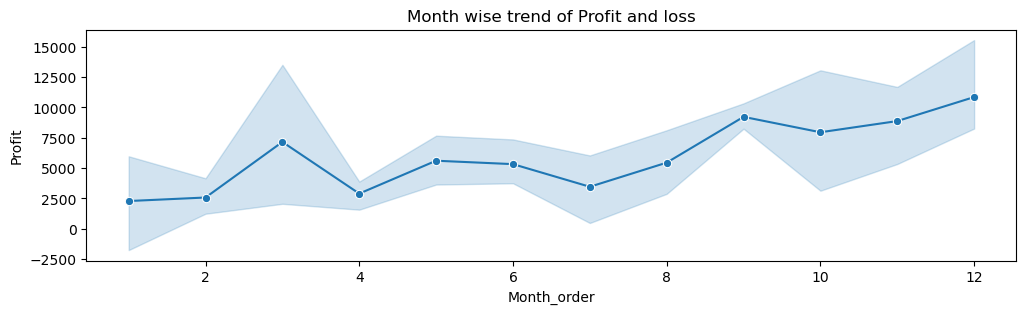

In [55]:
plt.figure(figsize=(12,3))
sns.lineplot(data=mom_orders,x='Month_order',y='Profit',marker='o')
plt.title('Month wise trend of Profit and loss') 

Text(0.5, 1.0, 'Month & Profit_to_Sales_%')

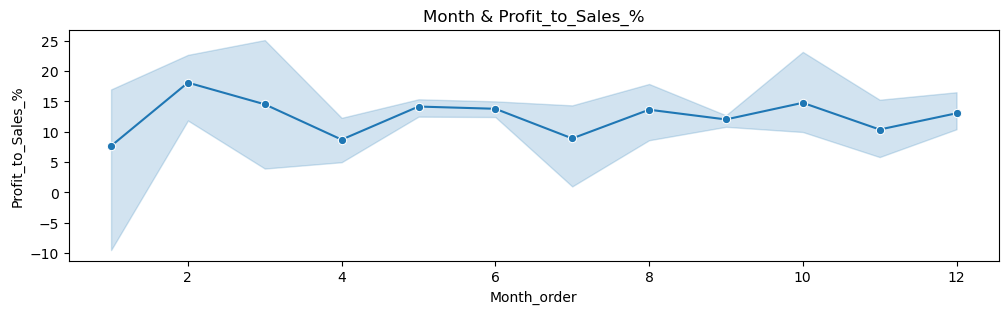

In [56]:
plt.figure(figsize=(12,3))
sns.lineplot(data=mom_orders,x='Month_order',y='Profit_to_Sales_%',marker='o')
plt.title('Month & Profit_to_Sales_%')

### How Discounts Affect Profitability

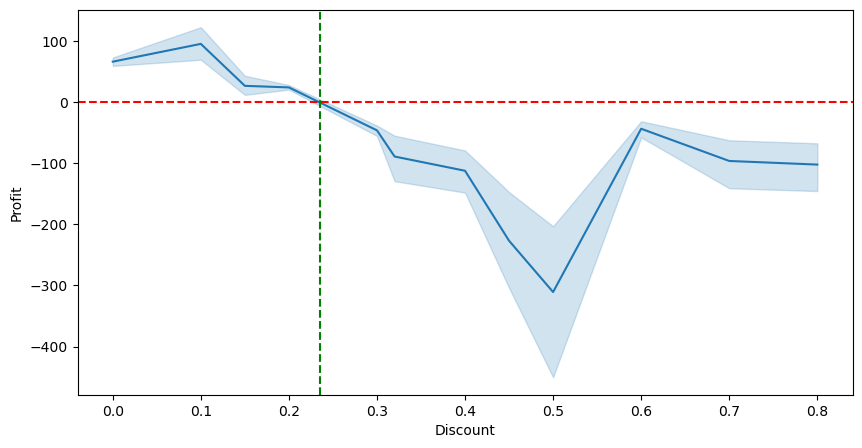

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(data=orders,x='Discount',y='Profit')
plt.axhline(y=0,linestyle='dashed',c='r')
plt.axvline(x=0.235,linestyle='dashed',c='g')

Discounts are commonly used to attract customers, but high discounts (above 23%) lead to negative profits.

📊 Discount vs Profitability:

🔍 Key Insights:
- Discounts up to 20% help drive sales, but beyond 23%, profits turn negative.
- Implement tiered discount strategies to prevent revenue losses.

<Axes: xlabel='Sales', ylabel='Profit'>

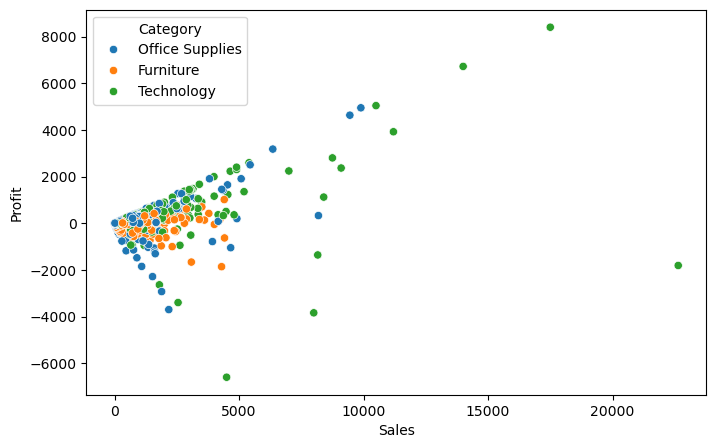

In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=orders,x='Sales',y='Profit',hue='Category')

## Returned orders detail

In [59]:
returned_orders = orders.merge(Return,how="right",on='Order ID')

In [60]:
returned_orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'delivery time', 'Month', 'Day', 'Year', 'Week', 'Quarter', 'Price',
       'Month_order', 'Customer_type', 'Returned'],
      dtype='object')

In [61]:
returned_orders['Order ID'].nunique()/orders['Order ID'].nunique()*100

5.909363146336594

The result 5.91% (rounded) means that 5.91% of all unique orders were returned.

A return rate of around 6% is not extremely high but suggests there might be some issues.

### Product return %

In [62]:
product_return_count = pd.DataFrame(returned_orders['Product Name'].value_counts()).reset_index()
product_return_count.columns = ['Product Name','return_count']
return_to_order = product_return_count.merge(product_orders,how='left',on='Product Name')
return_to_order['Product_return_%'] = round((return_to_order['return_count']/return_to_order['Order_count'])*100)
return_to_order.sort_values(by='Product_return_%',ascending=False).head(30)

,Product Name,return_count,Order_count,Product_return_%
611,Canon Color ImageCLASS MF8580Cdw Wireless Lase...,1,1,100.0
186,Cisco SPA 501G IP Phone,1,1,100.0
232,Okidata B401 Printer,1,1,100.0
27,Avery 500,2,2,100.0
243,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1,1,100.0
458,Hewlett-Packard Deskjet F4180 All-in-One Color...,1,1,100.0
599,Acco Glide Clips,1,1,100.0
227,Zebra GK420t Direct Thermal/Thermal Transfer P...,1,1,100.0
88,Advantus SlideClip Paper Clips,2,3,67.0
105,DAX Clear Channel Poster Frame,2,3,67.0


In [63]:
returned_orders['Product Name'].value_counts().head(30)

Product Name
Staple envelope                                                         4
KI Adjustable-Height Table                                              4
Longer-Life Soft White Bulbs                                            3
Staple holder                                                           3
Ibico Standard Transparent Covers                                       3
Stanley Bostitch Contemporary Electric Pencil Sharpeners                3
Tenex B1-RE Series Chair Mats for Low Pile Carpets                      3
Fellowes Strictly Business Drawer File, Letter/Legal Size               3
Avery Durable Binders                                                   3
Wilson Jones Easy Flow II Sheet Lifters                                 3
Staple-based wall hangings                                              3
Novimex Turbo Task Chair                                                3
Fellowes Black Plastic Comb Bindings                                    3
Staple remover           

✅ Key Observations:
1. Products with 100% Return Rate (High-Risk Items)
    - 8 products (e.g., Canon Color ImageCLASS MF8580Cdw, Cisco SPA 501G IP Phone, Okidata B401 Printer) were ordered once and returned every time.
2. Products with High Return Rates (50-67%)
   - Advantus SlideClip Paper Clips (67%), DAX Clear Channel Poster Frame (67%), Wirebound Service Call Books (60%), Xerox 1882 (60%), etc.
   - Electronics & Office Equipment (e.g., Cisco 9971 IP Video Phone, Kensington 6 Outlet Surge Protector, Xerox printers)
3. Categories with Frequent Returns
    - Printers & Office Electronics (Canon, Okidata, Zebra, Hewlett-Packard, Xerox)
    - Furniture & Accessories (Bush Bookcase, Global Leather Office Chair, Electrix Lamps)
    - Paper & Office Supplies (Service Call Books, Avery 500, Newell Pens)
    - Tech & Accessories (Samsung Galaxy Note 2, Logitech Wireless Speaker, Macally Suction Cup Mount)


### Region-wise Orders return %

In [64]:
region_wise_returned_orders = returned_orders[['Region','Order ID']].drop_duplicates()
region_wise_returned_orders = pd.DataFrame(region_wise_returned_orders['Region'].value_counts()).reset_index()

In [65]:
region_wise_returned_orders_per = region_wise_returned_orders.merge(region_wise_orders,how="left",on="Region")
region_wise_returned_orders_per['order_return_%'] = round(100*region_wise_returned_orders_per['count']/region_wise_returned_orders_per['Order_count'],2)
region_wise_returned_orders_per.sort_values(by='order_return_%',ascending=False)

,Region,count,Order_count,order_return_%
0,West,189,1611,11.73
2,Central,39,1175,3.32
1,East,44,1401,3.14
3,South,24,822,2.92


✅ Key Observations:
1.  West Has the Highest Return Rate (11.73%). Returns in the West are nearly 4x higher than other regions.
2.  Central & East Have Low & Stable Return Rates (3.32% & 3.14%)
3.  South Has the Best Return Rate (2.92%)

### Unique order & Order return % function 

In [147]:
def Unique_order(items,parameter,table):
    return pd.DataFrame(pd.DataFrame(table[[items,parameter]].drop_duplicates())[items].value_counts()).reset_index()

In [160]:
def Order_return_percent(item,par,return_table,order_table):
    return_orders = Unique_order(items=item,parameter=par,table=return_table)
    orders_count = Unique_order(items=item,parameter=par,table=order_table)
    orders_count.columns = [item,"Order_count"]
    # Join tables on
    final = return_orders.merge(orders_count,how='left',on=item)
    final['Order_return_%'] = round(100*final['count']/final['Order_count'],2)
    return final.sort_values(by='Order_return_%',ascending=False)

### Segment-wise Orders return %

In [162]:
Order_return_percent(item='Segment',par='Order ID',return_table=returned_orders,order_table=orders)

,Segment,count,Order_count,Order_return_%
1,Corporate,93,1514,6.14
0,Consumer,154,2586,5.96
2,Home Office,49,909,5.39


✅ Key Observations:
1.  Corporate Segment Has the Highest Return Rate (6.14%)
2.  Consumers Have a Moderate Return Rate (5.96%). Individual consumers return at a slightly lower rate than corporate buyers.
3.  Home Office Has the Lowest Return Rate (5.39%). 

### State-wise Orders return %

In [163]:
Order_return_percent(item='State',par='Order ID',return_table=returned_orders,order_table=orders)

,State,count,Order_count,Order_return_%
15,Utah,4,26,15.38
31,Montana,1,8,12.50
7,Oregon,7,56,12.50
0,California,127,1021,12.44
6,Colorado,9,79,11.39
1,Washington,29,256,11.33
14,Delaware,4,44,9.09
33,Idaho,1,11,9.09
23,New Mexico,2,22,9.09
4,Arizona,9,108,8.33


✅ Key Observations:
1. High Return Rate States (Above 10%).
   - California has the highest volume of returns (127), but its return rate (12.44%) is consistent with other high-return states.
   - Utah, Montana, and Oregon have extreme return percentages (~12-15%), indicating possible product dissatisfaction or logistics issues.
   - Washington & Colorado also show high return rates, meaning the West Coast generally faces a higher return trend.
2. Medium Return Rate States (5-10%).
    - States like Arizona and Delaware have moderate return rates, but higher order volumes than smaller states like Idaho & New Mexico.
    - Returns in these states may be influenced by specific product categories rather than logistics issues.
3. Low Return Rate States (Below 5%)
   - Texas, New York, and Illinois process a high volume of orders but maintain low return rates.
   - North Carolina has the lowest return rate (1.47%)—indicating strong customer satisfaction.
   - These states can be used as a benchmark for return reduction strategies in high-return regions.

### Sub-Category-wise Orders return %

In [166]:
Order_return_percent(item='Sub-Category',par='Order ID',return_table=returned_orders,order_table=orders)

,Sub-Category,count,Order_count,Order_return_%
14,Machines,13,112,11.61
9,Tables,30,307,9.77
8,Appliances,40,451,8.87
11,Fasteners,19,215,8.84
2,Phones,71,814,8.72
12,Supplies,16,187,8.56
1,Paper,99,1191,8.31
0,Binders,108,1316,8.21
6,Chairs,47,576,8.16
3,Furnishings,67,877,7.64


✅ Key Observations:
1. Machines Have the Highest Return Rate (11.61%).
2. Tables & Chairs Have High Returns (9-8%) – Likely Due to Shipping Damage
3. Tech Products Have High Returns – Phones (8.72%) & Copiers (7.35%)
4. Office Supplies & Low-Cost Items Have the Lowest Return Rates

### Category-wise Orders return %

In [165]:
Order_return_percent(item='Category',par='Order ID',return_table=returned_orders,order_table=orders).head(15)

,Category,count,Order_count,Order_return_%
2,Technology,123,1544,7.97
1,Furniture,136,1764,7.71
0,Office Supplies,234,3742,6.25


✅ Key Observations:
1. Technology Has the Highest Return Rate (7.97%). Tech products are returned the most compared to other categories.
   - Possible reasons:
   - Defective items or compatibility issues (e.g., printers, phones, accessories).
   - Customer expectations mismatch (e.g., laptops or electronics not meeting performance needs).
   - Frequent upgrades or replacements, leading to returns.
2. Furniture is the second most returned category.
   - Possible reasons:
   - Size & fit issues – Customers may order incorrectly sized furniture.
   - Damaged deliveries – Large & fragile items can be more prone to shipping damage.
   - Assembly difficulties – Customers might struggle with installation.
3. Office Supplies Have the Lowest Return Rate (6.25%). Office supplies have the fewest returns, despite the highest order volume (3,742 orders).
   -  Possible reasons:
   -  Low-cost items → Customers may not bother returning them.
   -  Standardized products → Less likelihood of defects or dissatisfaction.
     
Actionable
1. Improve quality checks for technology products before shipping.
2. Ensure compatibility information is clear in product descriptions.
3. Offer troubleshooting guides to help customers before they decide to return.
4. Provide detailed dimensions & installation videos to avoid wrong purchases.
5. Encourage subscription-based purchases for high-demand items (e.g., paper, ink, staples).

In [169]:
Order_return_percent(item='delivery time',par='Order ID',return_table=returned_orders,order_table=orders)

,delivery time,count,Order_count,Order_return_%
6,0 days,19,252,7.54
3,3 days,37,509,7.27
5,7 days,20,308,6.49
7,1 days,11,182,6.04
2,2 days,40,675,5.93
4,6 days,35,596,5.87
0,4 days,78,1403,5.56
1,5 days,56,1084,5.17


✅ Key Observations:
1. Same-Day Delivery Has the Highest Return Rate (7.54%)
   - Order fulfillment errors – Faster shipping increases the risk of incorrect packaging.
   - Damaged items – Rushed handling may lead to shipping damages.
2. Faster Deliveries (1-3 Days) Have Higher Return Rates (~6-7%)
    - 1-day (6.04%) and 3-day (7.27%) deliveries have higher-than-average returns.
    - Customers may expect perfect quality with faster deliveries → More dissatisfaction if items don’t meet expectations.
3. 5-Day Delivery Has the Lowest Return Rate (5.17%)
   - 5-day deliveries have the lowest return rate despite handling 1,084 orders.
   - Better fulfillment accuracy → More time allows for careful packaging & delivery.

Actionable
1. Improve quality control for same-day orders to minimize packing/shipping errors.
2. Offer order verification prompts at checkout to prevent impulse mistakes.
3. Use better packaging for fragile items to prevent damages in rushed deliveries.
4. Enhance customer communication (email confirmations, order tracking) for fast deliveries.
5. Encourage customers to choose 4-5 day delivery (e.g., offer small incentives like free shipping).
6. Optimize fulfillment times for a balance between speed & accuracy.

In [170]:
Order_return_percent(item='Day',par='Order ID',return_table=returned_orders,order_table=orders)

,Day,count,Order_count,Order_return_%
4,Thursday,47,746,6.30
6,Wednesday,11,182,6.04
0,Friday,55,916,6.00
2,Sunday,50,850,5.88
3,Saturday,49,837,5.85
1,Monday,53,920,5.76
5,Tuesday,31,558,5.56


In [171]:
Order_return_percent(item='Month',par='Order ID',return_table=returned_orders,order_table=orders)

,Month,count,Order_count,Order_return_%
10,January,13,178,7.30
4,August,24,341,7.04
0,December,49,702,6.98
3,October,29,417,6.95
5,March,22,354,6.21
6,April,21,343,6.12
11,February,9,162,5.56
1,November,41,753,5.44
8,July,18,338,5.33
2,September,36,688,5.23


✅ Key Observations:
1. January Has the Highest Return Rate (7.30%).
2. High Return Rate in August (7.04%) & December (6.98%).
   - December: Holiday shopping rush → Increased returns in January.
3. Low Return Rate in June (4.12%).
   - No major seasonal shopping events, reducing impulse purchases.

Actionable
1. Promote products with low return rates in June to maximize profitability.
2. Use June as a model for improving order accuracy in other months.
3. Ensure accurate order fulfillment in December to reduce return reasons.
4. mprove return policies & customer support for holiday returns.
5. Offer exchange options instead of refunds to retain revenue.
6. Monitor specific products with high return rates in January

Returned Vs Shipped Orders

In [188]:
return_orders_detail = returned_orders[['Order ID','Discount','Profit','Sales']].groupby(
    ['Order ID']).agg(
    Product_count=('Order ID','count'),Total_Sales=('Sales','sum'),Avg_Sales=('Sales','mean'),
    Total_Profit=('Profit','sum'),Avg_Profit=('Profit','mean'),Total_Discount=('Discount','sum'),Avg_Discount=('Discount','mean')).reset_index().round()

In [189]:
shipped_order = orders.merge(Return,how='left',on='Order ID')
shipped_order = shipped_order[shipped_order['Returned'].isna()]
shipped_orders_detail = shipped_order[['Order ID','Discount','Profit','Sales']].groupby(
    ['Order ID']).agg(
    Product_count=('Order ID','count'),Total_Sales=('Sales','sum'),Avg_Sales=('Sales','mean'),
    Total_Profit=('Profit','sum'),Avg_Profit=('Profit','mean'),Total_Discount=('Discount','sum'),Avg_Discount=('Discount','mean')).reset_index().round()

In [190]:
return_orders_detail.describe()

,Product_count,Total_Sales,Avg_Sales,Total_Profit,Avg_Profit,Total_Discount,Avg_Discount
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,2.702703,609.807432,215.145270,78.489865,27.381757,0.293919,0.030405
std,1.899008,1126.650542,361.682438,506.378829,153.204039,0.652061,0.171991
min,1.000000,2.000000,2.000000,-3791.000000,-735.000000,0.000000,0.000000
25%,1.000000,92.500000,45.000000,6.750000,5.000000,0.000000,0.000000
50%,2.000000,262.000000,113.500000,31.500000,16.000000,0.000000,0.000000
75%,3.000000,705.000000,286.250000,96.500000,38.000000,0.000000,0.000000
max,14.000000,14052.000000,4684.000000,6734.000000,2245.000000,4.000000,1.000000


In [191]:
shipped_orders_detail.describe()

,Product_count,Total_Sales,Avg_Sales,Total_Profit,Avg_Profit,Total_Discount,Avg_Discount
count,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000
mean,1.950774,449.127944,221.278591,55.835561,27.457882,0.239338,0.065351
std,1.362281,942.216934,443.152238,332.210304,173.338062,0.525259,0.247171
min,1.000000,1.000000,1.000000,-6892.000000,-2929.000000,0.000000,0.000000
25%,1.000000,36.000000,27.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,146.000000,85.000000,16.000000,11.000000,0.000000,0.000000
75%,2.000000,497.000000,238.000000,66.000000,35.000000,0.000000,0.000000
max,12.000000,23661.000000,10500.000000,8762.000000,5040.000000,4.000000,1.000000


✅ Key Observations:
1. Product Count: More Items in Returned Orders
   - Avg. Product Count : 2.70 (Returned) and 1.95 for (Shipped order). Returned orders contain more products per order.
   - Larger orders (3+ items) tend to have higher return rates.
2. Customers tend to return orders in the mid-range price category.
   - Avg. Sales per Order :	215.14 (Returned orders) & 221.28 for (Shipped orders). Returned orders have slightly lower sales per order.
3. Profitability: Returns Cause Major Losses
   - Avg. Profit per Order:	 27.38  for Returned order & 27.46 for Shipped orders.	Returns significantly reduce overall profit margins.
4. Discounts: Higher Discounts Increase Returns
   - Avg. Discount per Order: 13.4% for Returned orders & 6.5%	for shipped orders .Higher discounts correlate with more returns.